In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ceo = pd.read_excel('ceo.xls')
ceo

,salary,totcomp,tenure,age,sales,profits,assets,Unnamed: 7
0,3030,8138,7,61,161315.0,2956.0,257389.0,NaN
1,6050,14530,0,51,144416.0,22071.0,237545.0,NaN
2,3571,7433,11,63,139208.0,4430.0,49271.0,NaN
3,3300,13464,6,60,100697.0,6370.0,92630.0,NaN
4,10000,68285,18,63,100469.0,9296.0,355935.0,NaN
...,...,...,...,...,...,...,...,...
442,1866,4311,10,59,2934.0,375.0,35800.2,NaN
443,906,2627,6,59,2932.8,193.9,4986.5,NaN
444,2300,2387,9,57,2910.0,182.9,2738.7,NaN
445,875,1151,7,50,2904.7,132.0,5008.7,NaN


In [3]:
mean = np.mean(ceo.totcomp)
mean

8340.058165548098

Mean doesn't mean anything at that point. It is the middle value when all salaries are sorted in order.

In [105]:
mean_trimmed_5 = stats.trim_mean(ceo.totcomp, 0.05)
mean_trimmed_5

4637.679900744417

5% trimmed mean is much lower than mean. We have right skewed distribution with most
extreme outliers on the right side

In [109]:
median = np.median(ceo.totcomp)
median

2951.0

Median is almost three times less, than mean. It means we don't have symmetrical distribution. It is positively skewed. Distribution has long right tail.
Probably with many outliers. It's important later to understand reason of that for future analisys of data.

In [110]:
lower_quartile = np.percentile(ceo.totcomp.sort_values(), 25)
lower_quartile

1575.5

Lower quartile is 1575.5. 25 percent of CEO's earned less than 1.6 millions. 

In [112]:
upper_quartile = np.percentile(ceo.totcomp, 75)
upper_quartile

6043.0

Upper boundary of the most concentrated results. 

In [7]:
lower_5_percentile = np.percentile(ceo.totcomp, 5)
lower_5_percentile

783.7

Lower boundary. it is pretty low, compared to upper quartile. 

In [8]:
upper_5_percentile = np.percentile(ceo.totcomp, 95)
upper_5_percentile

24563.3

Upper boundary is high. It just reassures us about skewed plot

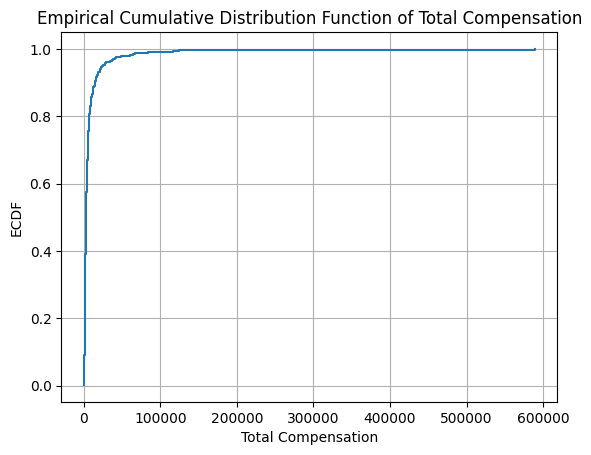

14.796488300344116

In [139]:
totcomp = ceo['totcomp']
totcomp = np.sort(totcomp)
y = np.arange(1, len(totcomp) + 1) / len(totcomp)
plt.step(totcomp, y, where='post')
plt.xlabel('Total Compensation')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function of Total Compensation')
plt.grid(True)
plt.yscale("linear")
plt.show()

from scipy.stats import skew 
skew(ceo.totcomp, axis=0, bias=True)

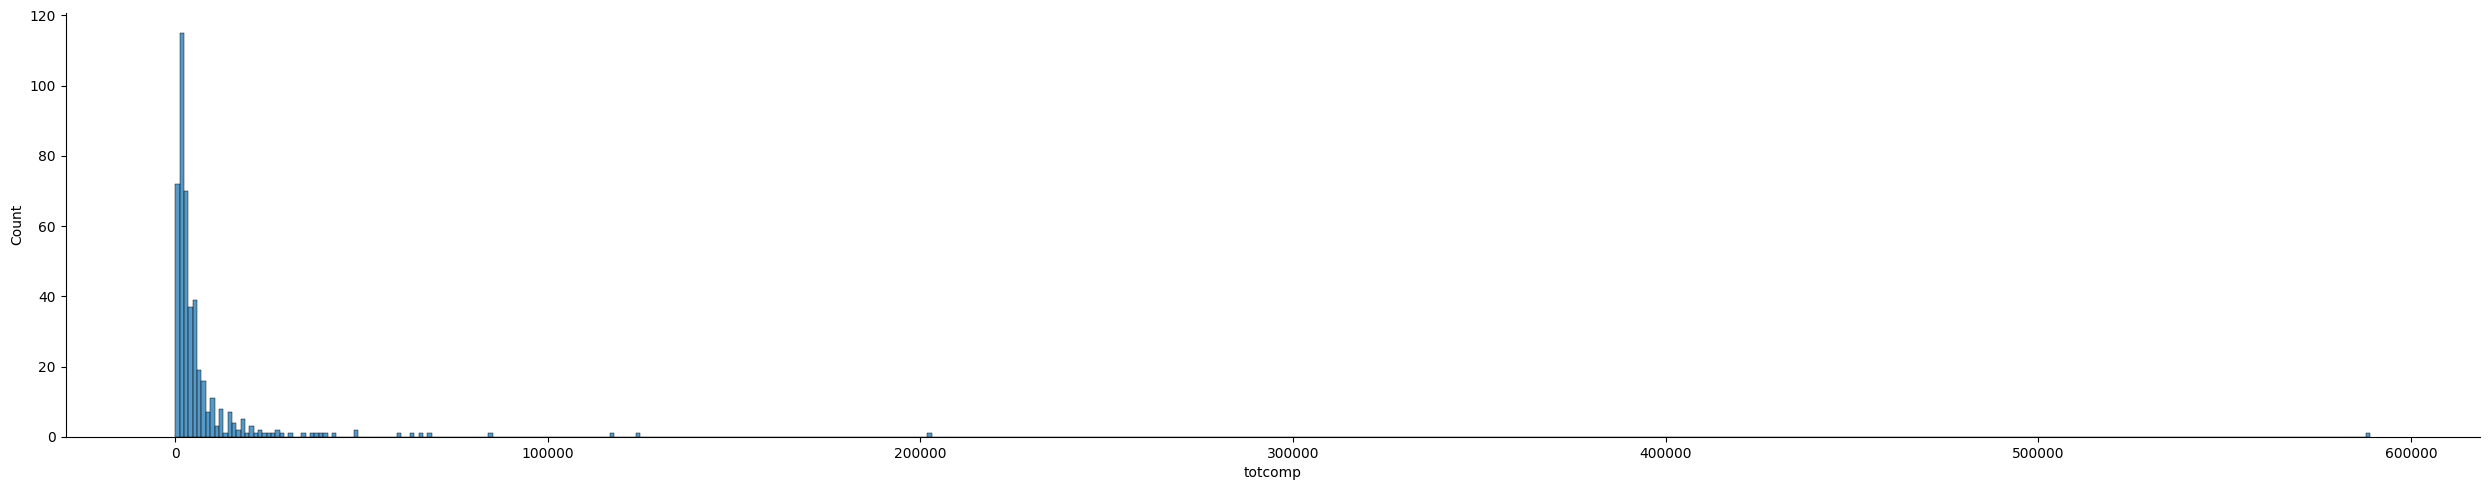

In [11]:
sns.displot(ceo['totcomp'], aspect=5)

In [96]:
# Compute and explain in economic terms the following quantities i. Fˆ−1 (0.1) and Fˆ−1(0.9)
percentile_10 = np.percentile(totcomp, 10)
percentile_90 = np.percentile(totcomp, 90)
print(percentile_90)
count_observations = 0

for i in totcomp:
    if i < percentile_10:
        count_observations += 1
print ("Fˆ−1 (0.1) = ", count_observations)

count_observations = 0
for i in totcomp:
    if i > percentile_90:
        count_observations += 1
print ("Fˆ−1 (0.9) = ", count_observations)

count_observations = 0
for i in totcomp:
    if i <= 2000:
        count_observations += 1
print ("Fˆ(2000) = ", count_observations)

count_observations = 0
for i in totcomp:
    if i > 4000:
        count_observations += 1
print ("1 - Fˆ(4000) = ", count_observations)

print(totcomp)

# Compute ii. Fˆ(2000) and 1 - Fˆ(4000):
# Fˆ(2000) - Probability of total compensation less than or equal to 2000
prob_less_than_2000 = np.sum(totcomp <= 2000) / len(totcomp)

# 1 - Fˆ(4000) - Probability of total compensation greater than 4000
prob_greater_than_4000 = 1 - np.sum(totcomp <= 4000) / len(totcomp)

# Print and explain the results:
print(f"i. Fˆ⁻¹(0.1) (10th percentile): {percentile_10}")
print(f"   - This represents the total compensation below which 10% of the data falls. It's a measure of the lower end of the compensation distribution.")
print()
print(f"i. Fˆ⁻¹(0.9) (90th percentile): {percentile_90}")
print(f"   - This represents the total compensation below which 90% of the data falls. It's a measure of the upper end of the compensation distribution.")
print()
print(f"ii. Fˆ(2000) (Probability of ≤ 2000): {prob_less_than_2000}")
print(f"   - This is the probability that a randomly selected individual's total compensation is less than or equal to $2000.")
print()
print(f"ii. 1 - Fˆ(4000) (Probability of > 4000): {prob_greater_than_4000}")
print(f"   - This is the probability that a randomly selected individual's total compensation is greater than $4000.")

15046.000000000005
Fˆ−1 (0.1) =  45
Fˆ−1 (0.9) =  45
Fˆ(2000) =  154
1 - Fˆ(4000) =  172
[   100    341    427    497    501    542    543    550    568    587
    606    633    638    641    673    682    701    709    730    748
    763    777    778    797    802    836    859    873    880    886
    889    892    892    905    908    908    914    919    956    962
    968    991   1000   1000   1000   1004   1006   1006   1019   1049
   1050   1051   1056   1056   1060   1085   1087   1089   1090   1093
   1103   1139   1150   1150   1150   1151   1180   1184   1199   1240
   1242   1248   1288   1297   1308   1311   1327   1340   1345   1345
   1345   1346   1352   1370   1379   1381   1390   1409   1419   1425
   1439   1440   1449   1480   1481   1485   1492   1494   1500   1504
   1515   1528   1530   1539   1540   1548   1556   1561   1568   1570
   1571   1573   1578   1601   1603   1613   1615   1616   1620   1639
   1643   1653   1663   1663   1675   1679   1683   1717   

We got same count on observations in first ten percentile and last ten percentle of totcomp (45)
A balance in the top and bottom percentiles could indicate that there's a mix of companies compensating CEOs
at higher and lower  levels, which might be seen as a fair representation of the market.

As for "lower" range of less than 2 mln usd in compensation and "higher" range of more than 4mln the distribution is not symmetric, as the number of observations in the lower range (Fˆ(2000)) is different from the number in the upper range (1 − Fˆ(4000)).
154 vs 172 to be exact.
The distribution might be right-skewed, indicating that there are more observations with lower 'totcomp' values than with higher 'totcomp' values.

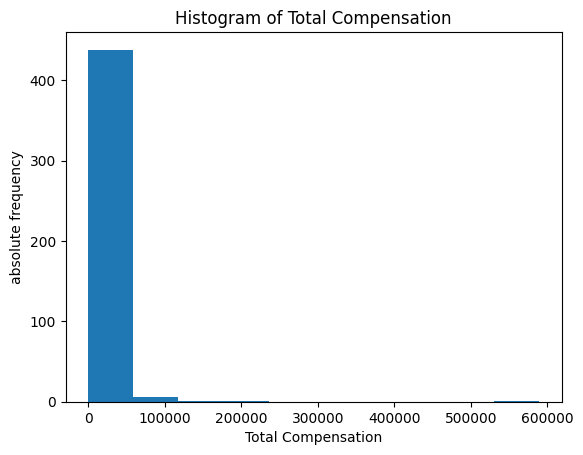

In [30]:
plt.hist(totcomp)
plt.xlabel('Total Compensation')
plt.ylabel('absolute frequency')
plt.title('Histogram of Total Compensation')
plt.show()

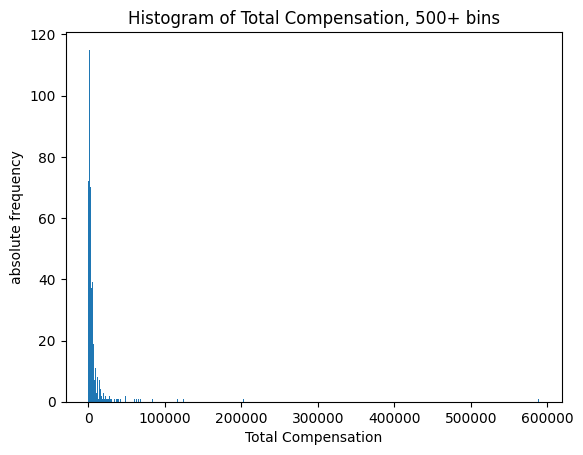

In [31]:
plt.hist(totcomp, bins = 'auto')
plt.xlabel('Total Compensation')
plt.ylabel('absolute frequency')
plt.title('Histogram of Total Compensation, 500+ bins')
plt.show()

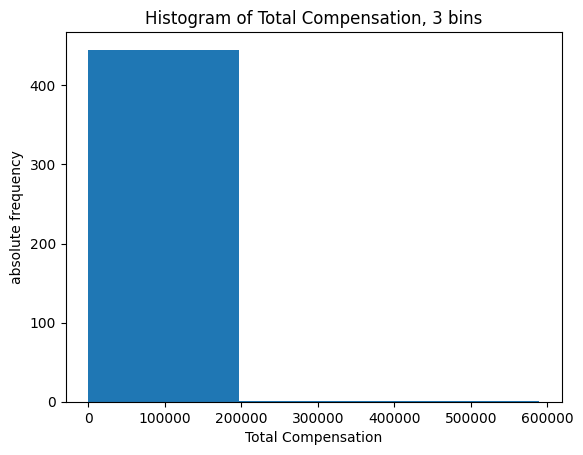

In [32]:
plt.hist(totcomp, bins = 3)
plt.xlabel('Total Compensation')
plt.ylabel('absolute frequency')
plt.title('Histogram of Total Compensation, 3 bins')
plt.show()

Default number of bins in hist of matplolib is 10. There is algorithm, 
that tries to select optimal bins numbers. If we set it on 'auto', we will get 500+ bins. 
Which is outrageous.
The choice of the number of bins affect the appearance 
of the histogram and the level of detail you observe in the data. With few of them 
much of data is lost, with too many we are lost in unnecessary data. 10 is more or
less optimal choice to watch uneven distribution.

With super tiny and small bars you can't learn anything. Intervals are too volatile, too spiky and strange.
Oversmoother is bad either. Too many observations in one bucket. 

Asymmetric hostogram with spike in 0-50000 range. Starting point is 0 in every histogram, though.

And to mention hist took "nice numbers" to display on x axis.

Size of square is relative frequency of values. Depending on buckets number we mostly have one big square. 

Height of each bin in histogram represents how many values are in that range. In
our histogram it is absolute frequency. Width is range. For 10 bins it is 10 percent of our min to
max total compensation

A lot of information from regional sample is lost. Despite number of bins

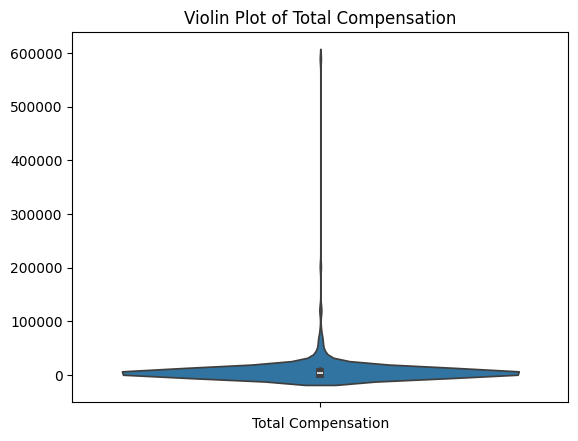

In [99]:
sns.violinplot(data=totcomp)

# Add labels and title
plt.xlabel("Total Compensation")
plt.title("Violin Plot of Total Compensation")

# Show the plot
plt.show()

Fˆ−1 (0.1), Fˆ−1 (0.9) and Fˆ(2000) all are very close on the box-plot
1 − Fˆ(4000) starts from 4000 and extends to the end of y axes, around 600000

Mean of Original totcomp: 8340.058165548098
Median of Original totcomp: 2951.0
Mean of log(totcomp): 8.135686093478537
Median of log(totcomp): 7.989899374942939


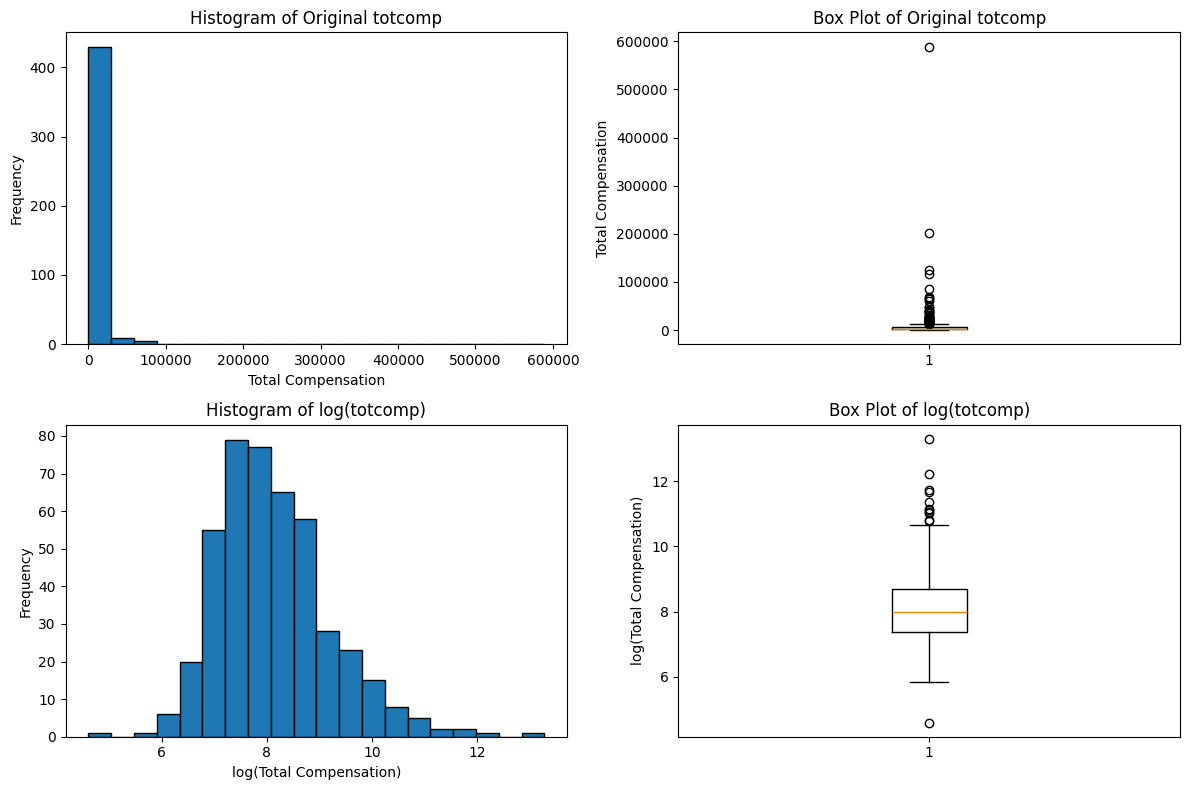

In [33]:
log_totcomp = np.log(totcomp)

# Create subplots for original and log-transformed data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original totcomp data
axes[0, 0].hist(totcomp, edgecolor='k', bins=20)
axes[0, 0].set_title('Histogram of Original totcomp')
axes[0, 0].set_xlabel('Total Compensation')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].boxplot(totcomp)
axes[0, 1].set_title('Box Plot of Original totcomp')
axes[0, 1].set_ylabel('Total Compensation')

# Log-transformed totcomp data
axes[1, 0].hist(log_totcomp, edgecolor='k', bins=20)
axes[1, 0].set_title('Histogram of log(totcomp)')
axes[1, 0].set_xlabel('log(Total Compensation)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].boxplot(log_totcomp)
axes[1, 1].set_title('Box Plot of log(totcomp)')
axes[1, 1].set_ylabel('log(Total Compensation)')

# Calculate mean and median for both datasets
mean_totcomp = np.mean(totcomp)
median_totcomp = np.median(totcomp)
mean_log_totcomp = np.mean(log_totcomp)
median_log_totcomp = np.median(log_totcomp)

# Print mean and median values
print("Mean of Original totcomp:", mean_totcomp)
print("Median of Original totcomp:", median_totcomp)
print("Mean of log(totcomp):", mean_log_totcomp)
print("Median of log(totcomp):", median_log_totcomp)

plt.tight_layout()
plt.show()

The natural logarithm transformation can make the data more symmetric, and in this case, 
it may help in stabilizing the variance and making the distribution closer to a normal 
distribution. The mean and median values for the log-transformed data can provide a different 
perspective on the central tendency of the data. This data shows less skewness 
and is better suited for statistical analyses.

In [40]:
ceo

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0
...,...,...,...,...,...,...,...
442,1866,4311,10,59,2934.0,375.0,35800.2
443,906,2627,6,59,2932.8,193.9,4986.5
444,2300,2387,9,57,2910.0,182.9,2738.7
445,875,1151,7,50,2904.7,132.0,5008.7


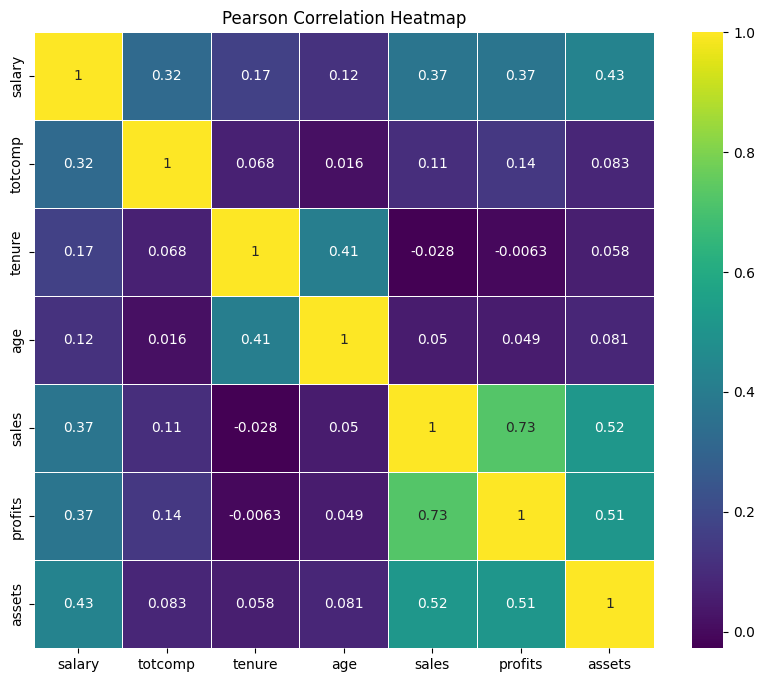

In [47]:
# Ensure all remaining columns are in numeric format
ceo = ceo.apply(pd.to_numeric, errors='coerce')

# Remove rows with missing (NaN) values
ceo = ceo.dropna()
correlation_matrix = ceo.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

Strongest correlation from ceo.xls is with sales, profits and assets. Ranges from moderate to strong correlation.
Highest is sales to profits (0.73):
In economic terms, this means that as sales increase, profits tend to increase as well. It indicates a positive association between the two variables, implying that higher sales are associated with higher profits.
Assets to Sales (Correlation: 0.52):
In economic terms, this means that as sales increase, assets tend to increase, but the relationship is not as strong as in the case of profits and sales.
Profits to assets (0.51). 
In economic terms, this means that as a company's assets increase, profits tend to increase, but again, this relationship is not as strong as the profits-sales correlation.

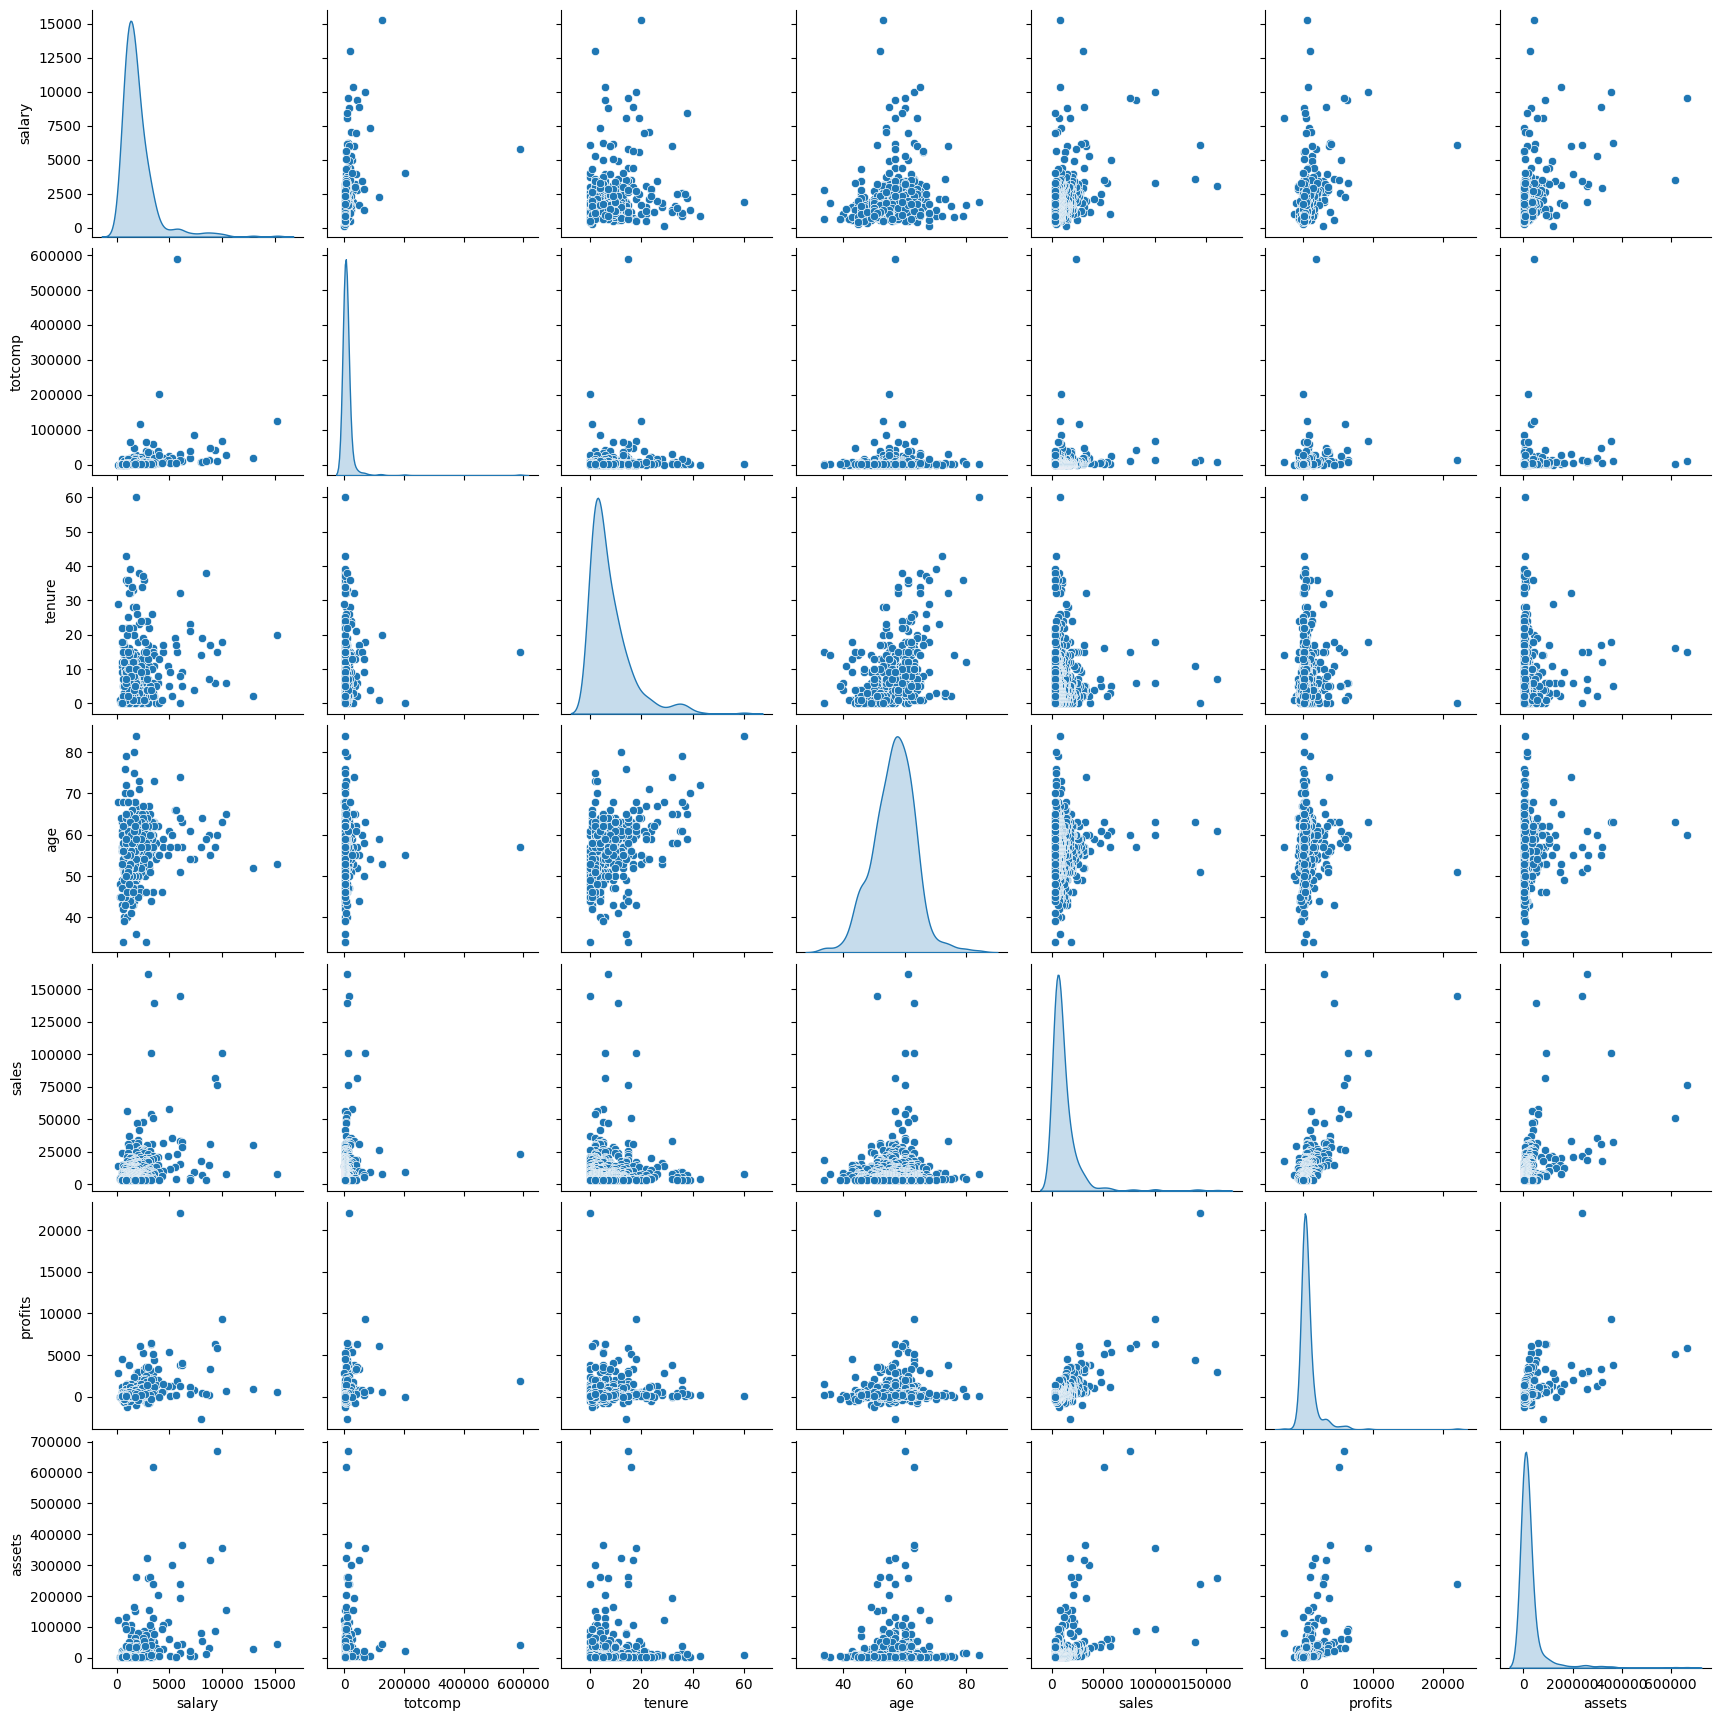

In [49]:
sns.pairplot(ceo, diag_kind='kde')


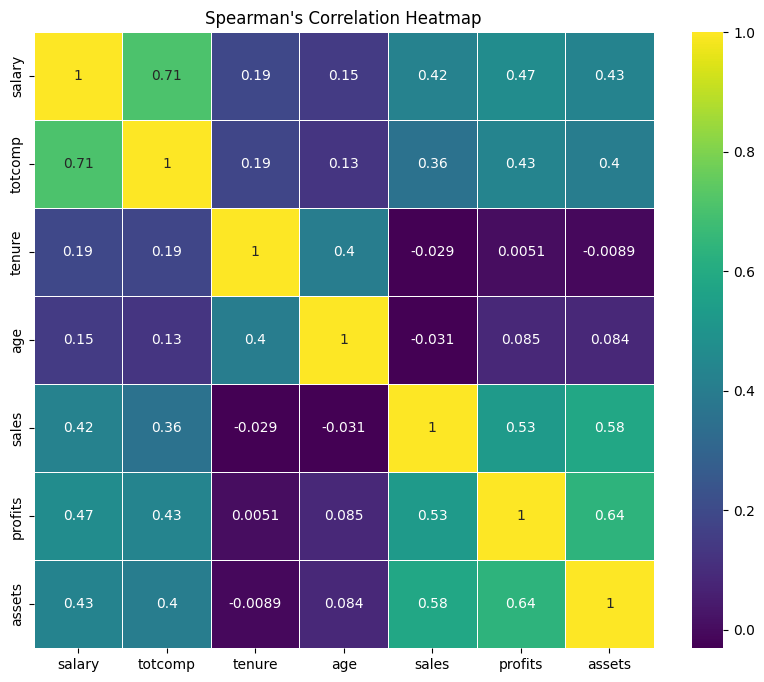

In [51]:
spearman_corr_matrix = ceo.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Spearman's Correlation Heatmap")
plt.show()

In [52]:
spearman_corr_matrix

,salary,totcomp,tenure,age,sales,profits,assets
salary,1.000000,0.707831,0.191974,0.149269,0.421091,0.465469,0.431009
totcomp,0.707831,1.000000,0.186276,0.127189,0.357656,0.433552,0.402117
tenure,0.191974,0.186276,1.000000,0.402980,-0.029301,0.005143,-0.008935
age,0.149269,0.127189,0.402980,1.000000,-0.030716,0.084714,0.084490
sales,0.421091,0.357656,-0.029301,-0.030716,1.000000,0.527095,0.581529
profits,0.465469,0.433552,0.005143,0.084714,0.527095,1.000000,0.635524
assets,0.431009,0.402117,-0.008935,0.084490,0.581529,0.635524,1.000000


In [53]:
correlation_matrix

,salary,totcomp,tenure,age,sales,profits,assets
salary,1.000000,0.322023,0.172449,0.119466,0.371256,0.370315,0.431036
totcomp,0.322023,1.000000,0.067998,0.016046,0.105999,0.139931,0.083237
tenure,0.172449,0.067998,1.000000,0.405901,-0.027743,-0.006263,0.057682
age,0.119466,0.016046,0.405901,1.000000,0.050350,0.049096,0.081185
sales,0.371256,0.105999,-0.027743,0.050350,1.000000,0.725970,0.518214
profits,0.370315,0.139931,-0.006263,0.049096,0.725970,1.000000,0.510889
assets,0.431036,0.083237,0.057682,0.081185,0.518214,0.510889,1.000000


In our data, we can observe differences between Pearson and Spearman correlations. 
For example, in some cases, the Pearson correlation is weaker than the Spearman correlation. 
This might occur because the relationships in your data are not strictly linear, and Spearman 
is capturing the monotonic trends better. Additionally, Spearman can be more robust when 
dealing with ordinal or non-normally distributed data.

Linear correlation coefficient (Pearson's correlation coefficient) is appropriate,
as we don't see clear quadratic dependecies of our data, it is mostly linaear
We can see that on pairs.



In [55]:
ceo

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0
...,...,...,...,...,...,...,...
442,1866,4311,10,59,2934.0,375.0,35800.2
443,906,2627,6,59,2932.8,193.9,4986.5
444,2300,2387,9,57,2910.0,182.9,2738.7
445,875,1151,7,50,2904.7,132.0,5008.7


2c. What is the rank of the observation totcomp= 6000? Explain in your own words the conceptual difference between the two correlation coefficient and link it to linear/monotone
dependence.

In [114]:
value = 6000
# Find the two neighboring values
L1 = totcomp[totcomp < value][-1]
L2 = totcomp[totcomp > value][0]

# Find their ranks
N1 = np.where(totcomp == L1)[0][0] + 1

# Use linear interpolation to estimate the rank
rank = N1 + (value - L1) / (L2 - L1) - 1

print("Estimated rank of 6000:", rank)

Estimated rank of 6000: 333.64516129032256


Pearson focuses on straight-line patterns, while Spearman looks 
for any consistent pattern, even if it's not a straight line. 
The choice depends on whether you expect a strict straight-line
relationship or not. Simple as Pearson: linear, 
Spearman: monotone dependancy

2d.
Consider the two subsamples: CEOs younger than 50 and older than 50. Plot for both
subsamples overlapping histograms/ecdf’s and discuss the results. What can we learn
from the corresponding location and dispersion (!) measures?

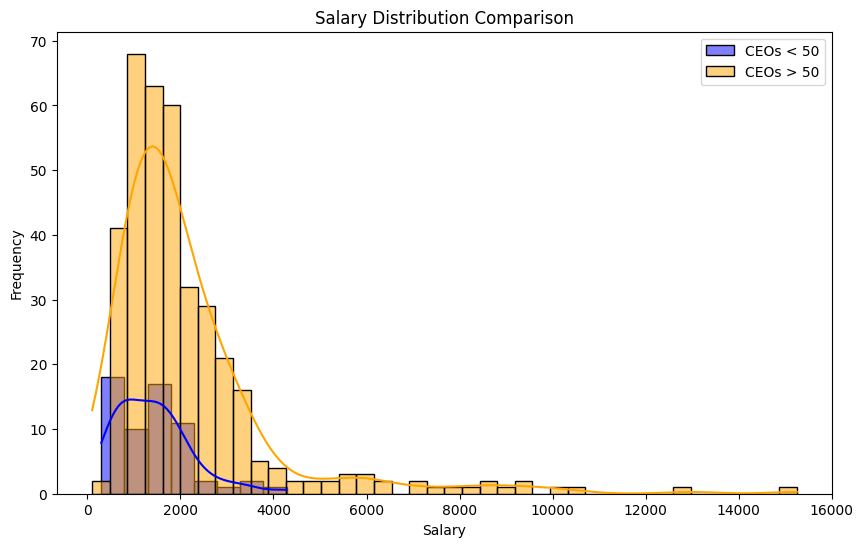

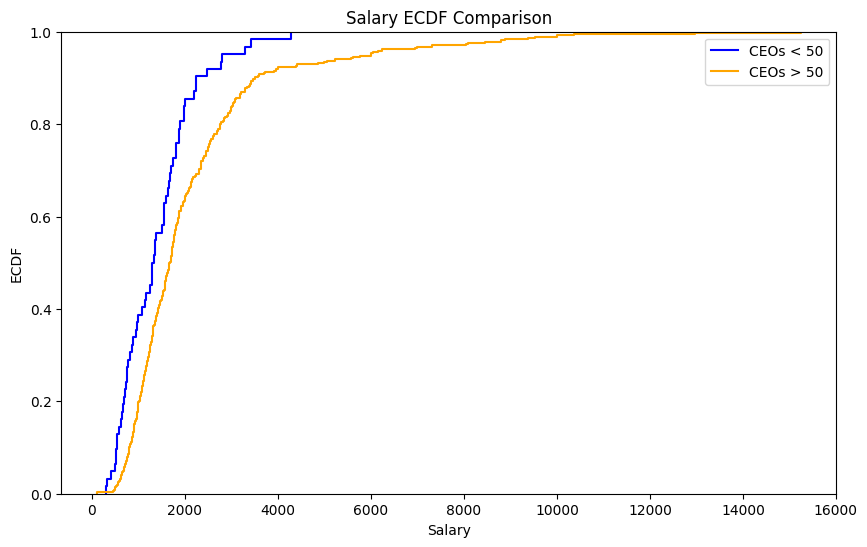

Mean Salary (CEOs < 50): 1406.5483870967741
Mean Salary (CEOs > 50): 2157.338753387534
Standard Deviation (CEOs < 50): 805.5481725359722
Standard Deviation (CEOs > 50): 1838.6135288047558


In [117]:
ceo_under_50 = ceo[ceo['age'] < 50]
ceo_over_50 = ceo[ceo['age'] > 50]

# Plot overlapping histograms for salary of younger and older CEOs
plt.figure(figsize=(10, 6))
sns.histplot(ceo_under_50['salary'], kde=True, label='CEOs < 50', color='blue')
sns.histplot(ceo_over_50['salary'], kde=True, label='CEOs > 50', color='orange')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution Comparison')
plt.legend()
plt.show()

# Plot overlapping ECDFs for salary of younger and older CEOs
plt.figure(figsize=(10, 6))
sns.ecdfplot(ceo_under_50['salary'], label='CEOs < 50', color='blue')
sns.ecdfplot(ceo_over_50['salary'], label='CEOs > 50', color='orange')
plt.xlabel('Salary')
plt.ylabel('ECDF')
plt.title('Salary ECDF Comparison')
plt.legend()
plt.show()


print(f"Mean Salary (CEOs < 50): {ceo_under_50['salary'].mean()}")
print(f"Mean Salary (CEOs > 50): {ceo_over_50['salary'].mean()}")
print(f"Standard Deviation (CEOs < 50): {ceo_under_50['salary'].std()}")
print(f"Standard Deviation (CEOs > 50): {ceo_over_50['salary'].std()}")







On average, CEOs who are older than 50 tend to have higher salaries compared
to CEOs who are younger than 50. This suggests that age may be a 
factor influencing salary, with older CEOs earning more on average.
std: Salaries among older CEOs have a wider range and higher variability,
while salaries among younger CEOs are more tightly clustered around the average.

3.

In [120]:
from scipy.stats import chi2_contingency

ceo['Salary Group'] = pd.cut(ceo['salary'], bins=[0, 3000, 5000, float('inf')], labels=['S1', 'S2', 'S3'])
ceo['Age Group'] = pd.cut(ceo['age'], bins=[0, 50, float('inf')], labels=['A1', 'A2'])

# Create the contingency table using pandas crosstab
contingency_table = pd.crosstab(ceo['Salary Group'], ceo['Age Group'])

# Calculate absolute frequencies
n11 = contingency_table.at['S1', 'A1']
n12 = contingency_table.at['S1', 'A2']
n21 = contingency_table.at['S2', 'A1']
n22 = contingency_table.at['S2', 'A2']
n31 = contingency_table.at['S3', 'A1']
n32 = contingency_table.at['S3', 'A2']

# Calculate total counts
n1_ = n11 + n12
n2_ = n21 + n22
n3_ = n31 + n32
n_1 = n11 + n21 + n31
n_2 = n12 + n22 + n32
n = n1_ + n2_

# Calculate relative frequencies (proportions)
h11 = n11 / n
h12 = n12 / n
h21 = n21 / n
h22 = n22 / n
h31 = n31 / n
h32 = n32 / n
h1_ = n1_ / n
h2_ = n2_ / n
h_1 = n_1 / n
h_2 = n_2 / n

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Contingency Table:")
print(contingency_table)
print("\nAbsolute Frequencies:")
print(f"n11: {n11}, n12: {n12}, n21: {n21}, n22: {n22}, n31: {n31}, n32: {n32}")
print("\nTotal Counts:")
print(f"n1_: {n1_}, n2_: {n2_}, n3_: {n3_}, n_1: {n_1}, n_2: {n_2}, n: {n}")
print("\nRelative Frequencies (Proportions):")
print(f"h11: {h11}, h12: {h12}, h21: {h21}, h22: {h22}, h31: {h31}, h32: {h32}")
print(f"h1_: {h1_}, h2_: {h2_}, h_1: {h_1}, h_2: {h_2}")
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


Contingency Table:
Age Group     A1   A2
Salary Group         
S1            75  309
S2             3   36
S3             0   24

Absolute Frequencies:
n11: 75, n12: 309, n21: 3, n22: 36, n31: 0, n32: 24

Total Counts:
n1_: 384, n2_: 39, n3_: 24, n_1: 78, n_2: 369, n: 423

Relative Frequencies (Proportions):
h11: 0.1773049645390071, h12: 0.7304964539007093, h21: 0.0070921985815602835, h22: 0.0851063829787234, h31: 0.0, h32: 0.05673758865248227
h1_: 0.9078014184397163, h2_: 0.09219858156028368, h_1: 0.18439716312056736, h_2: 0.8723404255319149

Chi-Square Statistic: 8.805900134398902
P-value: 0.012241174297036726
Degrees of Freedom: 2


The Chi-Square test will help us determine if there is a significant 
association between Salary Group and Age Group. The interpretation of the 
results depends on the p-value. We got ~0.012 p-value, which is significant, it 
indicates an association between the two variables. 


Problem 2

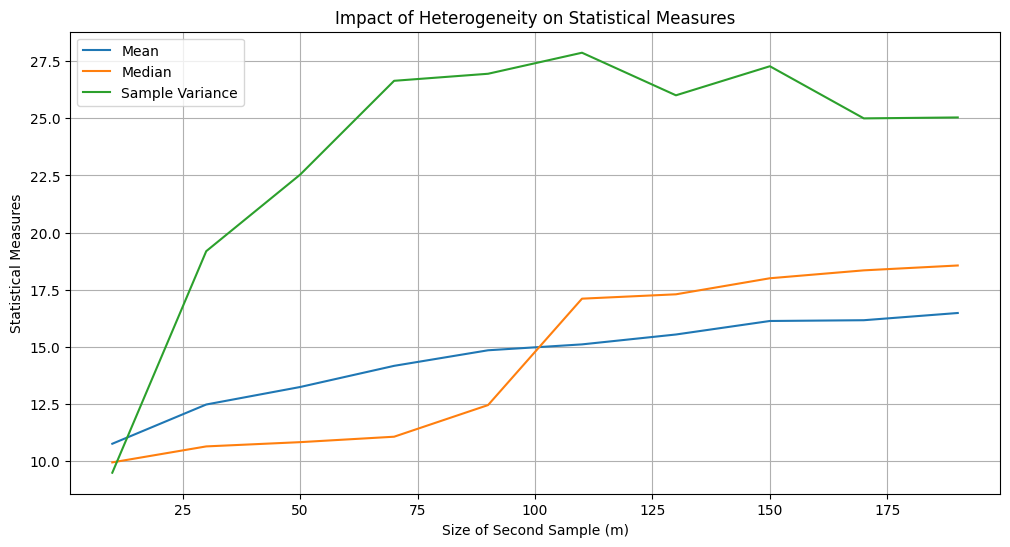

In [121]:
# Parameters for the first distribution (N(10, 1^2))
mean1 = 10
std1 = 1

# Parameters for the second distribution (N(20, 2^2))
mean2 = 20
std2 = 2

# Size of the initial sample
initial_sample_size = 100

# Values of m (size of the second sample)
m_values = range(10, 201, 20)

# Lists to store results
means = []
medians = []
variances = []

for m in m_values:
    # Generate the initial sample from the first distribution
    initial_sample = np.random.normal(mean1, std1, initial_sample_size)
    
    # Generate the second sample from the second distribution
    second_sample = np.random.normal(mean2, std2, m)
    
    # Combine the two samples
    combined_sample = np.concatenate((initial_sample, second_sample))
    
    # Calculate mean, median, and sample variance
    sample_mean = np.mean(combined_sample)
    sample_median = np.median(combined_sample)
    sample_variance = np.var(combined_sample, ddof=1)  # Use ddof=1 for sample variance
    
    means.append(sample_mean)
    medians.append(sample_median)
    variances.append(sample_variance)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(m_values, means, label="Mean")
plt.plot(m_values, medians, label="Median")
plt.plot(m_values, variances, label="Sample Variance")
plt.xlabel("Size of Second Sample (m)")
plt.ylabel("Statistical Measures")
plt.legend()
plt.title("Impact of Heterogeneity on Statistical Measures")
plt.grid()
plt.show()

In [123]:
# Define the desired correlation coefficient
desired_corr_coeff = 0.8  # Change this value as needed

# Generate a random sample U from N(0, 1)
sample_size = 1000
U = np.random.normal(0, 1, sample_size)

# Generate a second sample V from N(0, 1)
V = np.random.normal(0, 1, sample_size)

# Adjust the second sample V to achieve the desired correlation
# This step scales V and adds a linear transformation to achieve the desired correlation
V = desired_corr_coeff * U + np.sqrt(1 - desired_corr_coeff**2) * V

# Check the correlation coefficient
corr_coeff = np.corrcoef(U, V)[0, 1]
print(f"Simulated Correlation Coefficient: {corr_coeff:.2f}")

# Now, U and V are two samples with the desired correlation coefficient
#In this code, you can set the desired_corr_coeff variable to the 
#desired correlation coefficient. The code generates two independent 
#samples, U and V, and then adjusts V to achieve the specified correlation. Finally, it checks and prints the actual correlation coefficient to verify that it matches the desired value.







Simulated Correlation Coefficient: 0.81


Sample 1:
Pearson Correlation (Before): 0.62
Spearman Correlation (Before): 0.59
Pearson Correlation (After): 0.57
Spearman Correlation (After): 0.59

Sample 2:
Pearson Correlation (Before): -0.33
Spearman Correlation (Before): -0.31
Pearson Correlation (After): -0.26
Spearman Correlation (After): -0.31


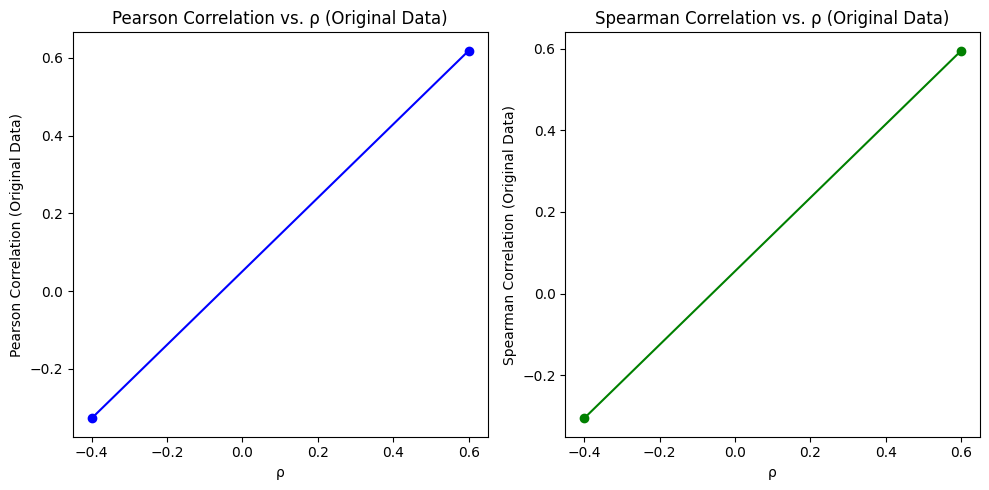

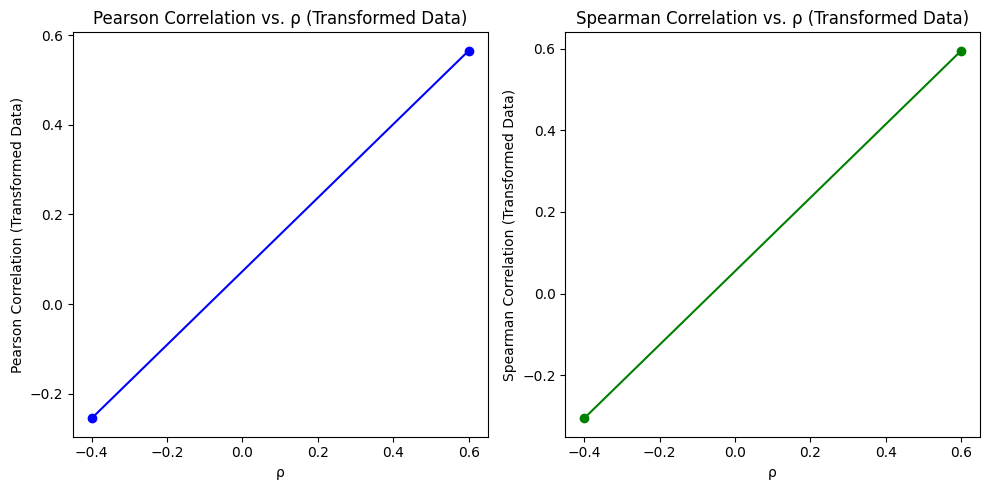

In [125]:
# Function to calculate Pearson and Spearman correlation coefficients
def calculate_correlations(sample1, sample2):
    pearson_corr = np.corrcoef(sample1, sample2)[0, 1]
    spearman_corr = stats.spearmanr(sample1, sample2).correlation
    return pearson_corr, spearman_corr

# (a) Generate two independent samples U ~ N(0, 1)
np.random.seed(0)
n = 100
sample_U1 = np.random.normal(0, 1, n)
sample_U2 = np.random.normal(0, 1, n)

# (b) Simulate two samples with different values of ρ
rho1 = 0.6  # Desired correlation coefficient for Sample 1
rho2 = -0.4  # Desired correlation coefficient for Sample 2

sample_X = np.random.normal(0, 1, n)
sample_Y1 = rho1 * sample_X + np.sqrt(1 - rho1**2) * sample_U1
sample_Y2 = rho2 * sample_X + np.sqrt(1 - rho2**2) * sample_U2

# Calculate correlations before transformation
pearson1_before, spearman1_before = calculate_correlations(sample_X, sample_Y1)
pearson2_before, spearman2_before = calculate_correlations(sample_X, sample_Y2)

# (c) Apply a nonlinear but monotone transformation (e.g., exp)
transformed_Y1 = np.exp(sample_Y1)
transformed_Y2 = np.exp(sample_Y2)

# Calculate correlations after transformation
pearson1_after, spearman1_after = calculate_correlations(sample_X, transformed_Y1)
pearson2_after, spearman2_after = calculate_correlations(sample_X, transformed_Y2)

# Print correlation coefficients before and after transformation
print("Sample 1:")
print(f"Pearson Correlation (Before): {pearson1_before:.2f}")
print(f"Spearman Correlation (Before): {spearman1_before:.2f}")
print(f"Pearson Correlation (After): {pearson1_after:.2f}")
print(f"Spearman Correlation (After): {spearman1_after:.2f}")

print("\nSample 2:")
print(f"Pearson Correlation (Before): {pearson2_before:.2f}")
print(f"Spearman Correlation (Before): {spearman2_before:.2f}")
print(f"Pearson Correlation (After): {pearson2_after:.2f}")
print(f"Spearman Correlation (After): {spearman2_after:.2f}")

# Plot Pearson vs. ρ and Spearman vs. ρ for the original data
rhos = [rho1, rho2]
pearson_correlations = [pearson1_before, pearson2_before]
spearman_correlations = [spearman1_before, spearman2_before]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(rhos, pearson_correlations, marker='o', linestyle='-', color='b')
plt.xlabel('ρ')
plt.ylabel('Pearson Correlation (Original Data)')
plt.title('Pearson Correlation vs. ρ (Original Data)')

plt.subplot(1, 2, 2)
plt.plot(rhos, spearman_correlations, marker='o', linestyle='-', color='g')
plt.xlabel('ρ')
plt.ylabel('Spearman Correlation (Original Data)')
plt.title('Spearman Correlation vs. ρ (Original Data)')

plt.tight_layout()

# Plot Pearson vs. ρ and Spearman vs. ρ for the transformed data
pearson_correlations_after = [pearson1_after, pearson2_after]
spearman_correlations_after = [spearman1_after, spearman2_after]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(rhos, pearson_correlations_after, marker='o', linestyle='-', color='b')
plt.xlabel('ρ')
plt.ylabel('Pearson Correlation (Transformed Data)')
plt.title('Pearson Correlation vs. ρ (Transformed Data)')

plt.subplot(1, 2, 2)
plt.plot(rhos, spearman_correlations_after, marker='o', linestyle='-', color='g')
plt.xlabel('ρ')
plt.ylabel('Spearman Correlation (Transformed Data)')
plt.title('Spearman Correlation vs. ρ (Transformed Data)')

plt.tight_layout()
plt.show()

This code first generates two independent samples U ~ N(0, 1). Then, it simulates two samples with different values of ρ. Finally, it applies the exp transformation to the samples and calculates correlation coefficients before and after the transformation. It also plots the correlation coefficients for both the original and transformed data.

In [126]:
# Given probabilities
P_pass_given_A = 0.80  # Probability of passing given belonging to group A
P_pass_given_B = 0.30  # Probability of passing given belonging to group B
P_A = 0.90  # Probability of belonging to group A
P_B = 0.10  # Probability of belonging to group B

# (a) Probability that a randomly chosen student passes the exam AND belongs to group A
P_pass_and_A = P_pass_given_A * P_A

# (b) Probability that a randomly chosen student passes the exam
P_pass = (P_pass_given_A * P_A) + (P_pass_given_B * P_B)

# (c) Probability that a student who passed the exam belongs to group B
P_B_given_pass = (P_pass_given_B * P_B) / P_pass

# Print the results
print("Probability that a randomly chosen student passes the exam AND belongs to group A:", P_pass_and_A)
print("Probability that a randomly chosen student passes the exam:", P_pass)
print("Probability that a student who passed the exam belongs to group B:", P_B_given_pass)

Probability that a randomly chosen student passes the exam AND belongs to group A: 0.7200000000000001
Probability that a randomly chosen student passes the exam: 0.7500000000000001
Probability that a student who passed the exam belongs to group B: 0.039999999999999994


In [129]:
import math
# Probability of a single vegetable serving being charred
p_charred = 0.60

# Number of vegetable servings
n_servings = 5

# Define the probability mass function for a binomial distribution
def binomial_pmf(k, n, p):
    # Calculate binomial coefficient (n choose k)
    coefficient = math.comb(n, k)
    # Calculate the probability mass function
    pmf = coefficient * (p ** k) * ((1 - p) ** (n - k))
    return pmf

# (a) Probability that none of the five vegetable servings is charred
p_none_charred = binomial_pmf(0, n_servings, p_charred)

# (b) Probability that exactly two of the five vegetable servings are charred
p_two_charred = binomial_pmf(2, n_servings, p_charred)

# (c) Probability that at least three out of five servings are charred
p_at_least_three_charred = sum(binomial_pmf(k, n_servings, p_charred) for k in range(3, n_servings + 1))

# Print the results
print("Probability that none of the five vegetable servings is charred:", p_none_charred)
print("Probability that exactly two of the five vegetable servings are charred:", p_two_charred)
print("Probability that at least three out of five servings are charred:", p_at_least_three_charred)
#This Python code uses the binomial probability mass function (PMF) to calculate the probabilities for each part (a, b, and c) based on the given probability of charred vegetable servings and the number of servings.







Probability that none of the five vegetable servings is charred: 0.010240000000000003
Probability that exactly two of the five vegetable servings are charred: 0.23040000000000002
Probability that at least three out of five servings are charred: 0.68256


In [130]:
import scipy.stats as stats

# Given parameters
mu_stock = 0.03  # Mean return of a single stock
sigma_stock = (0.02)**0.5  # Standard deviation of a single stock
Rf = 0.01  # Risk-free return

# Portfolio weights
stock_weight = 0.4
risk_free_weight = 0.6

# Number of stocks in the portfolio
num_stocks = 10

# Calculate probabilities for a single stock return
a_prob_larger_0_01 = 1 - stats.norm.cdf(0.01, mu_stock, sigma_stock)
b_prob_larger_equal_0_01 = 1 - stats.norm.cdf(0.01, mu_stock, sigma_stock)
c_prob_less_0_01 = stats.norm.cdf(0.01, mu_stock, sigma_stock)
between_0_01_and_0_03 = stats.norm.cdf(0.03, mu_stock, sigma_stock) - stats.norm.cdf(0.01, mu_stock, sigma_stock)

print("a. Probability that the return is larger than 0.01:", a_prob_larger_0_01)
print("b. Probability that the return is larger or equal to 0.01:", b_prob_larger_equal_0_01)
print("c. Probability that the return is less than 0.01:", c_prob_less_0_01)
print("d. Probability that the return is between 0.01 and 0.03:", between_0_01_and_0_03)

# Calculate portfolio parameters
portfolio_mu = num_stocks * stock_weight * mu_stock + risk_free_weight * Rf
portfolio_sigma = (num_stocks * stock_weight * (sigma_stock ** 2))**0.5

print("Mean of the portfolio return:", portfolio_mu)
print("Standard deviation of the portfolio return:", portfolio_sigma)

a. Probability that the return is larger than 0.01: 0.5562314580091424
b. Probability that the return is larger or equal to 0.01: 0.5562314580091424
c. Probability that the return is less than 0.01: 0.4437685419908576
d. Probability that the return is between 0.01 and 0.03: 0.05623145800914242
Mean of the portfolio return: 0.126
Standard deviation of the portfolio return: 0.282842712474619


In [171]:
tesla_df = pd.read_csv("TSLA.csv")
tesla_df["Date"]

0      2021-10-25
1      2021-11-01
2      2021-11-08
3      2021-11-15
4      2021-11-22
          ...    
101    2023-10-02
102    2023-10-09
103    2023-10-16
104    2023-10-23
105    2023-10-27
Name: Date, Length: 106, dtype: object

In [178]:
tesla_df['simple_Return'] = tesla_df['Close'].pct_change()
tesla_df['weekly_return'] = tesla_dfP_t-P_{t-1})/P_t
